##### Use AustraliaFiltered.xlsx dataset generated earlier.

- Plot bar chart of total no of immigrants for countires top 5 countires having max no of total immigrants
- Find total immigrants from each category by area name and plot barchart for each area
- Plot total immigration trend(immigration of world over the years i.e. year vs Total count for that year) using line plot.
- Compare Immigration Trend for Asia, Africa and Europe AreaName (Use Line plot).
- Plot Total Immigrants based on DevelopmenRegion 

  
- Plot immigration trend for India using line plot
- Plot immigration Trend(year vs count) for the coutries with top 5 total immigrants. Use Line plot
- For the above use area plot with alpha = 0.5


- Compare Immigration Trend for top-5 countires using stacked area plot

In [1]:
import pandas as pd
import matplotlib

In [2]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import style

In [3]:
Australia=pd.read_excel(r'C:\Users\shubham\Desktop\dsc_weekday_1\Assignments\shubham_k\AustraliaFiltered.xlsx')

In [4]:
Australia.head() 

,Unnamed: 0,Country,AreaName,Region,DevName,1980,1981,1982,1983,1984,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,224,Afghanistan,Asia,Southern Asia,Developing regions,10,20,30,30,70,...,110,180,140,560,..,..,..,..,..,4630
1,225,Albania,Europe,Southern Europe,Developed regions,0,0,0,0,0,...,130,110,110,140,..,..,..,..,..,1910
2,226,Algeria,Africa,Northern Africa,Developing regions,10,50,30,10,20,...,50,30,30,60,..,..,..,..,..,730
3,227,American Samoa,Oceania,Polynesia,Developing regions,0,0,0,0,0,...,0,0,0,10,..,..,..,..,..,30
4,228,Andorra,Europe,Southern Europe,Developed regions,0,0,10,0,0,...,10,0,10,10,..,..,..,..,..,100


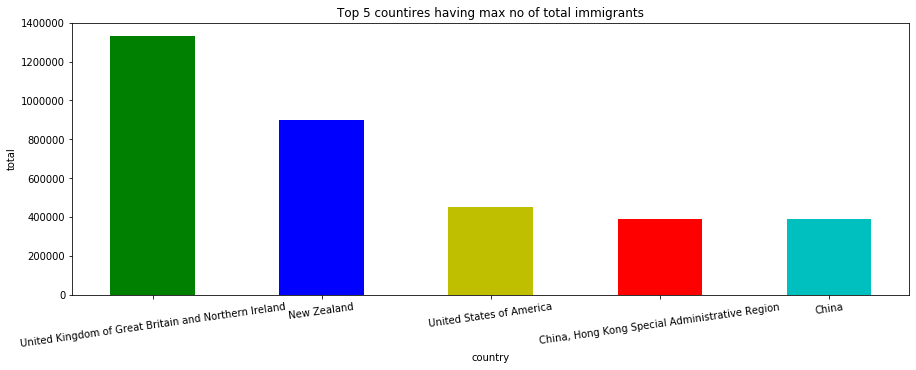

In [5]:
#Plot bar chart of total no of immigrants for countires top 5 countires having max no of total immigrants
T_country=Australia.nlargest(5,'Total')
#print(T_country)
plt.figure(figsize=(15,5))
plt.bar(T_country.Country,T_country.Total,color='gbyrc',width=0.5)
plt.xlabel('country')
plt.ylabel('total')
plt.title('Top 5 countires having max no of total immigrants')
plt.xticks(rotation=8)
plt.show()

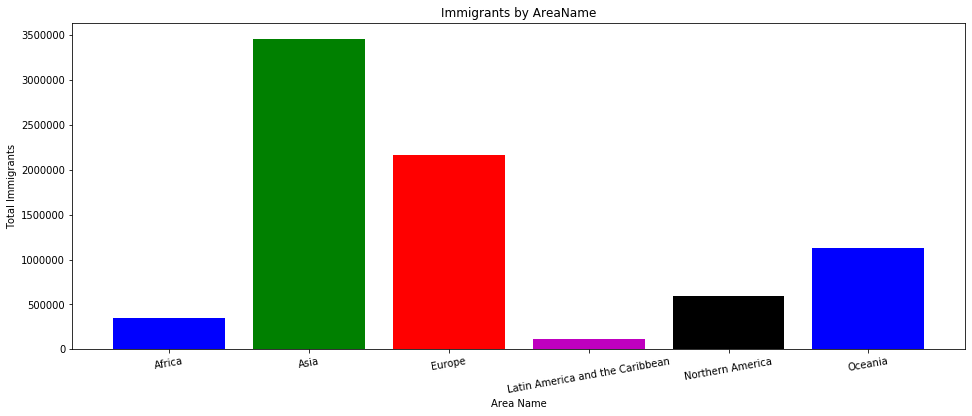

In [6]:
#Find total immigrants from each category by area name and plot barchart for each area
area_name = Australia.groupby(['AreaName'],as_index=False).sum()
#print(area_name)
plt.figure(figsize=(16,6))
plt.bar(area_name.AreaName,area_name.Total,color='bgrmk')
plt.xticks(rotation=10)
plt.ylabel('Total Immigrants')
plt.xlabel('Area Name')
plt.title('Immigrants by AreaName')
plt.show()


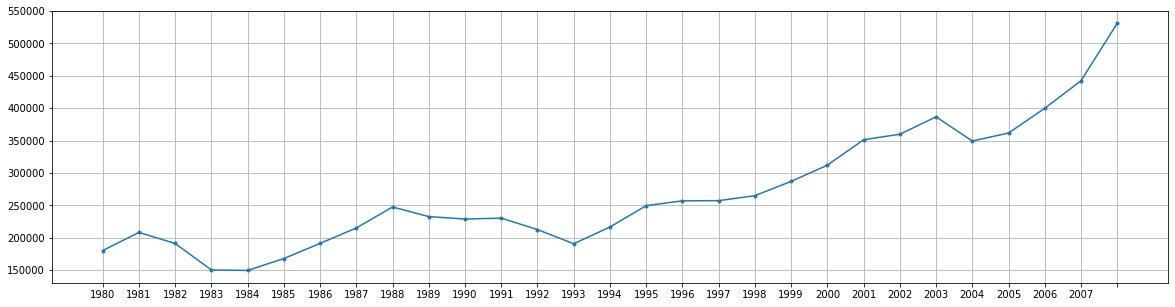

In [7]:
#Plot total immigration trend(immigration of world over the years i.e. year vs Total count for that year) using line plot.
T_immi_year=Australia.loc[:,'1980':'2008'].sum()
plt.figure(figsize=(20,5))
T_immi_year.plot(kind='line',marker='.')
plt.xticks(list(range(0,len(T_immi_year))),list(range(1980,2008)))
plt.grid()
plt.show()

           1980   1981   1982   1983   1984   1985   1986   1987   1988  \
AreaName                                                                  
Africa     6110   7040   7150   6290   5270   6370   9230  10430   9190   
Asia      45030  49250  46190  50930  55850  56090  61910  75460  87340   
Europe    70710  90540  86100  55080  45030  50070  60210  66180  73930   

           1989  ...    1999    2000    2001    2002    2003    2004    2005  \
AreaName         ...                                                           
Africa     6580  ...   14300   15050   18450   17960   22600   20840   22150   
Asia      88650  ...  120460  134620  164010  184830  194800  166160  172550   
Europe    70090  ...   79500   82870   88580   92960  106170   84260   84180   

            2006    2007    2008  
AreaName                          
Africa     22640   23800   29180  
Asia      202410  239900  299610  
Europe     89310   96870  106090  

[3 rows x 29 columns]
AreaName  Africa    Asia 

<Figure size 432x288 with 0 Axes>

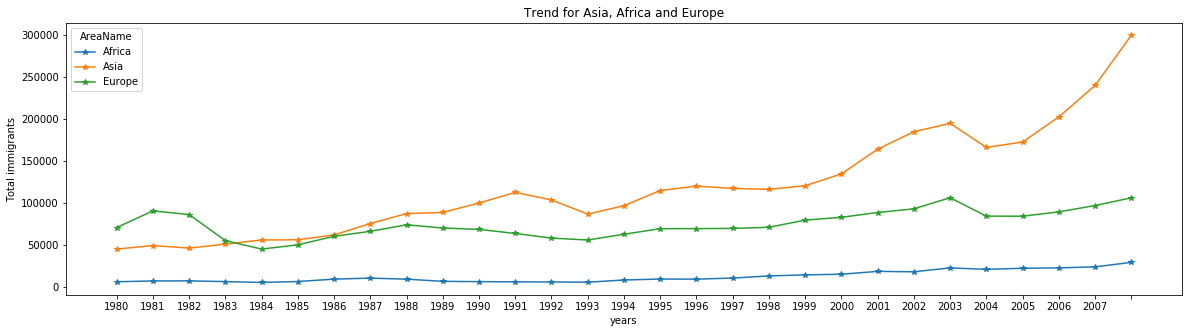

In [8]:
#Compare Immigration Trend for Asia, Africa and Europe AreaName (Use Line plot).
#Note:-
#stack() reshape the data into stacked formate row labels. It changes the wide table to a long table.
#When more than one column header is present we can stack the specific column header by specified the level.
#unstack() function in pandas converts the data into unstacked format. Let’s see with an example.
img_as=Australia.groupby('AreaName').sum().loc["Africa":"Europe","1980":"2008"]
print(img_as)
b=img_as.unstack().unstack() 
print(b)
plt.figure()
b.plot(kind='line',marker='*',figsize=(20,5))
plt.xticks(list(range(0,len(b))),list(range(1980,2008)))
plt.xlabel('years')
plt.ylabel('Total immigrants')
plt.title('Trend for Asia, Africa and Europe')
plt.show()

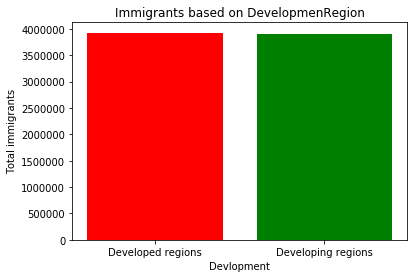

In [9]:
#Plot Total Immigrants based on DevelopmenRegion
img_dev=Australia.groupby(['DevName'],as_index=False).sum()
plt.figure()
plt.bar(img_dev.DevName,img_dev.Total,color='rg')
plt.title('Immigrants based on DevelopmenRegion')
plt.xlabel('Devlopment')
plt.ylabel('Total immigrants')
plt.show()

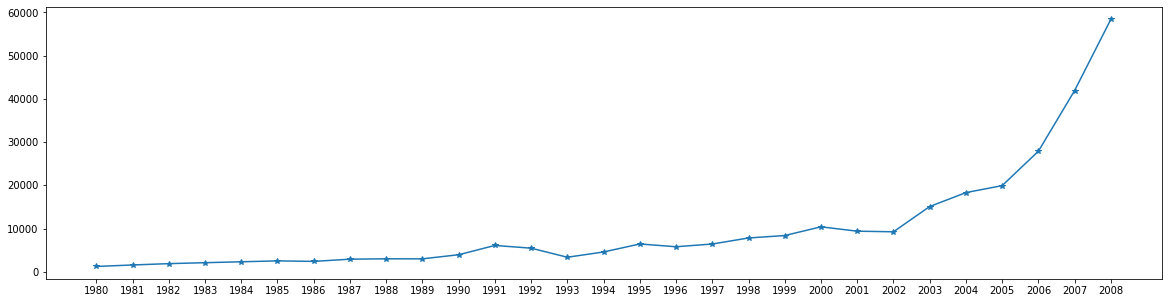

In [26]:
#Plot immigration trend for India using line plot
a = Australia.Country=='India'
b = Australia[a].loc[:,'1980':'2008'].sum()
b.plot(kind ='line', marker ='*',figsize=(20,5))
plt.xticks(list(range(0, len(b))), list(range(1980,2009)))
plt.show()

In [ ]:
#Plot immigration Trend(year vs count) for the coutries with top 5 total immigrants. Use Line plot
a = Australia.nlargest(5,'Total')
b=a.groupby(by='Country').sum().loc[:,'1980':'2008']
c=b.unstack().unstack()
c.plot(kind='line',figsize=(20,5),marker='.')
plt.xticks(list(range(0,len(c))),list(range(1980,2008)))
plt.xlabel("Years")
plt.ylabel("Total immigrants")
plt.grid()
plt.title("Trend of top 5 countries")
plt.show()


In [ ]:
#For the above use area plot with alpha = 0.5
c.plot(kind='area',figsize=(20,5),stacked=False,alpha=0.5)
plt.xticks(list(range(0,len(c))),list(range(1980,2008)))
plt.xlabel("Years")
plt.ylabel("Total immigrants")
plt.grid()
plt.title("Trend of top 5 countries")
plt.show()

In [ ]:
#Compare Immigration Trend for top-5 countires using stacked area plot
c.plot(kind='area',figsize=(20,5),alpha=0.5)
plt.xticks(list(range(0,len(c))),list(range(1980,2008)))
plt.xlabel("Years")
plt.ylabel("Total immigrants")
plt.grid()
plt.title("Trend of top 5 countries")
plt.show()